# Data Mining Project | TOPIC: Linear Regression


---
***IMPORTING REQD. LIBRARIES:***

---



In [0]:
import numpy as np # Library that makes numeric computations easy, specially on arrays.
import pandas as pd  # Helps to structure and clean data for analysis in the form of Dataframes.
import matplotlib.pyplot as plt # for visualisation (like graphs)
import seaborn as sns # for visualisation

In [0]:
from sklearn.model_selection import train_test_split # For splitting the dataset
from sklearn import metrics

---
***LOADING DATASET:***

---

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Real_estate.csv to Real_estate.csv


In [0]:
dataframe = pd.read_csv("Real_estate.csv")
#dataframe.drop(dataframe.index[0], inplace=True)
dataframe.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest metro station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


---
***PREPROCESSING:***

---

In [0]:
dataframe.drop(["X1 transaction date", "X5 latitude",	"X6 longitude"], axis = 1, inplace = True) 
dataframe.head()

,No,X2 house age,X3 distance to the nearest metro station,X4 number of convenience stores,Y house price of unit area
0,1,32.0,84.87882,10,37.9
1,2,19.5,306.59470,9,42.2
2,3,13.3,561.98450,5,47.3
3,4,13.3,561.98450,5,54.8
4,5,5.0,390.56840,5,43.1


In [0]:
dataframe.rename(columns={'No':'Number',
                          'X2 house age':'X1 house age',
                          'X3 distance to the nearest metro station':'X2 distance to the nearest metro station',
                          'X4 number of convenience stores':'X3 number of convenience stores'
                          }, 
                 inplace=True)
dataframe.head(3)

,Number,X1 house age,X2 distance to the nearest metro station,X3 number of convenience stores,Y house price of unit area
0,1,32.0,84.87882,10,37.9
1,2,19.5,306.59470,9,42.2
2,3,13.3,561.98450,5,47.3


In [0]:
n_rows,n_columns=dataframe.shape

print(f'There are {n_rows} number of rows and {n_columns} columns')

There are 414 number of rows and 5 columns


In [0]:
dataframe.dropna(how='any',inplace=True) #to drop if any value in the row has a nan
print("Missing values exist? ", dataframe.isnull().values.any())

Missing values exist?  False


{'boxes': [<matplotlib.patches.PathPatch at 0x7f5bfa4c1a20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5bfa4db198>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5bfa4dbb70>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5bfa4db828>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5bfa4c1c50>,
  <matplotlib.lines.Line2D at 0x7f5bfa499828>]}

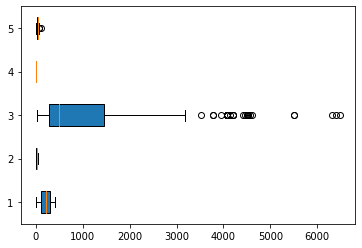

In [0]:
boxplot_data = [dataframe['Number'], dataframe['X1 house age'],dataframe['X2 distance to the nearest metro station'],dataframe['X3 number of convenience stores'],dataframe['Y house price of unit area']]
plt.boxplot(boxplot_data,vert=0, patch_artist=True)

---
***LINEAR REGRESSION :***

---

> What the Linear Regression technique does is, it finds the best possible line which fits that training set and then predicts the price of any unseen house (i.e. which was not in the training set).




In [0]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(17, 24))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(dataframe[col],dataframe["Y house price of unit area"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

3


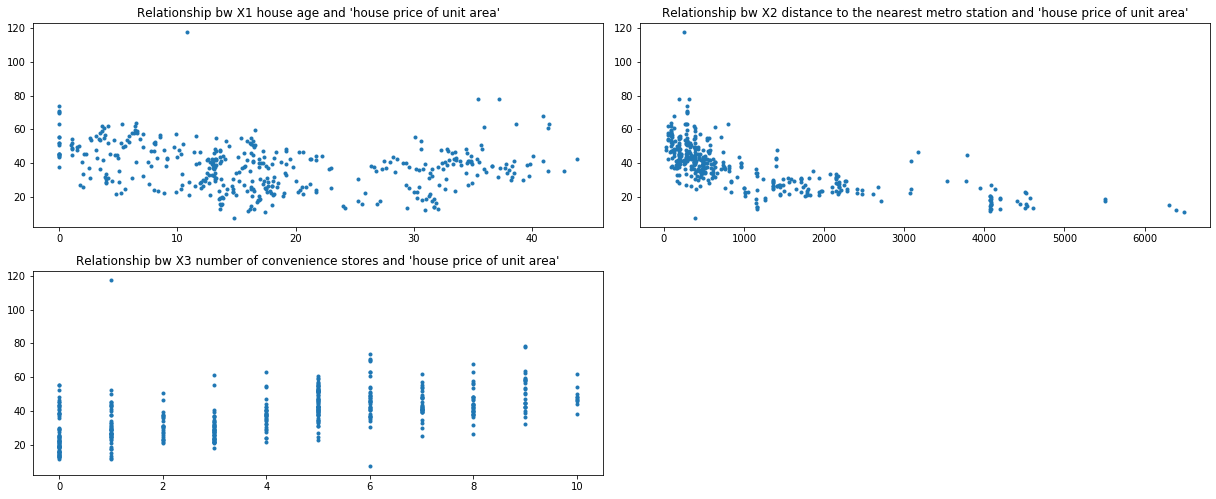

In [0]:
colnames = ['X1 house age', 'X2 distance to the nearest metro station', 'X3 number of convenience stores']
plotFeatures(colnames,"Relationship bw %s and 'house price of unit area'")

In [0]:
#Divide the data into independent and dependent variables
x = pd.DataFrame(dataframe["X1 house age"])
y = pd.DataFrame(dataframe["Y house price of unit area"])

In [0]:
# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [0]:
# Shape of the train and test sets
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(331, 1)
(83, 1)
(331, 1)
(83, 1)


***-> Using sklearn linear model for Linear Regression***

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [0]:
def linear_model_main(X_parameters,Y_parameters,predict_value):
 
    # Create linear regression object
    regr = LinearRegression()
    regr.fit(X_parameters, Y_parameters)
    predict_outcome = regr.predict(predict_value)
    predictions = {}
    predictions['intercept'] = regr.intercept_
    predictions['coefficient'] = regr.coef_
    predictions['predicted_value'] = predict_outcome
    return predictions

In [0]:
result = linear_model_main(X_train,Y_train,X_test)

In [0]:
print("Intercept value: " , result['intercept'])
print("coefficient:" , result['coefficient'])
print("Avg Predicted value: ",np.mean(result['predicted_value']))
print("Avg Actual value: ",np.mean(Y_test))

Intercept value:  [43.09578408]
coefficient: [[-0.24603642]]
Avg Predicted value:  38.836982615971806
Avg Actual value:  Y house price of unit area    35.057831
dtype: float64


In [0]:
Y_pred = result['predicted_value']
print(Y_pred)

[[40.53700533]
 [42.82514402]
 [40.90605996]
 [39.15920139]
 [43.09578408]
 [39.47904874]
 [38.61792128]
 [39.87270701]
 [38.74093948]
 [35.64088062]
 [36.42819716]
 [35.51786241]
 [37.75679381]
 [42.48069303]
 [41.64416921]
 [38.64252492]
 [43.09578408]
 [40.19255435]
 [38.86395769]
 [39.18380504]
 [38.59331763]
 [38.02743387]
 [34.09085119]
 [41.96401655]
 [41.34892551]
 [38.66712856]
 [41.34892551]
 [41.00447453]
 [41.86560199]
 [38.9869759 ]
 [42.60371124]
 [33.623382  ]
 [38.37188486]
 [41.10288909]
 [38.86395769]
 [39.7496888 ]
 [36.55121537]
 [35.34563692]
 [40.85685268]
 [39.08539047]
 [34.60752767]
 [35.24722235]
 [41.47194372]
 [42.11163841]
 [39.84810336]
 [41.91480927]
 [39.40523781]
 [37.87981202]
 [36.60042265]
 [33.30353466]
 [39.77429244]
 [33.22972373]
 [35.49325877]
 [39.72508515]
 [43.09578408]
 [35.34563692]
 [43.09578408]
 [39.84810336]
 [39.50365238]
 [39.92191429]
 [35.22261871]
 [39.97112157]
 [38.17505572]
 [39.7496888 ]
 [39.65127423]
 [33.3281383 ]
 [32.31938

In [0]:
def show_linear_line(X_parameters,Y_parameters):
    # Create linear regression object
    regr = LinearRegression()
    regr.fit(X_parameters, Y_parameters)
    plt.scatter(X_parameters,Y_parameters,color='blue')
    plt.plot(X_parameters,regr.predict(X_parameters),color='red',linewidth=4)
    plt.xticks(())
    plt.yticks(())
    plt.show()


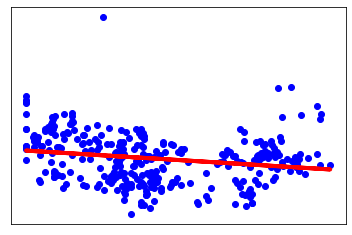

In [0]:
show_linear_line(X_train, Y_train) #Best Fitting Line

In [0]:
print(Y_pred.shape)
print(Y_test.shape)

(83, 1)
(83, 1)


In [0]:
# Actual value
Y_test = np.asarray(Y_test).T
#print(Y_test)
Y_act_pred = pd.DataFrame({'Actual Y':list(Y_test), 'Predicted Y:':list(Y_pred)})
Y_act_pred

,Actual Y,Predicted Y:
0,[27.3],[40.5370053325814]
1,[54.4],[42.82514401601811]
2,[22.0],[40.90605995894216]
3,[11.6],[39.1592013941679]
4,[45.4],[43.09578407534933]
...,...,...
78,[33.1],[39.9219142886468]
79,[59.6],[39.0115795436236]
80,[40.8],[41.250510943545535]
81,[52.2],[43.09578407534933]


In [0]:
# Evaluate the algorithm
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


Mean Absolute Error:  10.058958319629378
Mean Squared Error:  156.14066745147673
Root Mean Squared Error:  12.4956259327605
